In [1]:
import pickle
import copy
import os
# import sys
import numpy as np
from datetime import datetime as dt,timedelta
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mlib
import matplotlib.gridspec as gridspec
from datetime import datetime as dt,timedelta
from cartopy import crs as ccrs
from lib import driver
import lib 

from lib.tools import get_cmap_levels
from lib.tools import add_prop
import pandas as pd
from lib.tools import make_colormap
from lib.tools import map_proj
from mpl_toolkits.basemap import Basemap,shiftgrid,addcyclic


ERROR 1: PROJ: proj_create_from_database: Open of /home/ycheng/.conda/envs/cpc/share/proj failed


In [78]:
LIMdriver = driver.Driver(f'/home/ycheng/LIM/v2_CPC/run_code/namelist_realtime.py')
LIMdriver.get_variables()
LIMdriver.get_eofs()

reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SST.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF750.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF100.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_T2m.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SLP.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_H500.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_colIrr.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SOIL.p
reading colIrr for LIM 1
reading H500 for LIM 1
reading SLP for LIM 1
reading T2m for LIM 1
reading SOIL for LIM 1
reading SF750 for LIM 1
reading SF100 for LIM 1
reading SST for LIM 1
reading CPCtemp for LIM 1
reading colIrr for LIM 2
reading H500 for LIM 2
reading SLP for LIM 2
reading T2m for LIM 2
reading SOIL for LIM 2
reading SF750 for LIM 2
reading SF100 for LIM 2
reading SST for LIM 2
reading CPCtemp for LIM 2
reading colIrr for LIM 3
reading H500 for LIM 3
reading SLP for LIM 3
reading T2m for LIM

In [3]:
m=1
limkey = m
varname='colIrr'
varobj = LIMdriver.use_vars[varname]['data'] 
eofobj = LIMdriver.eofobjs[m][varname]
# eofobj.pc
t1 = (dt(2000,limkey,1)-timedelta(days=0)).strftime('%m/%d')
t2 = (dt(2000,limkey,1)+timedelta(days=60)).strftime('%m/%d')
tmpobjs = {}
tmpobjs[varname] = copy.copy(LIMdriver.use_vars[varname]['data'])
tmpobjs[varname].subset((t1,t2))
dir(tmpobjs[varname])
# self.use_vars[vname]['data']

# obj.plot(num_eofs=23)
# dir(varobj)
# varobj.time.shape(21543)
# eofobj.pc.shape# (3592,100)
# print(eofobj.time_extended)

No season 0 in subset
datewhere size in subset (3548,)
In subset, colIrr, read in as anomaly, has period 1958-01-08 00:00:00 -- 2016-03-01 00:00:00


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_date_range_test',
 'attrs',
 'climo',
 'climo_mean',
 'climo_stdev',
 'climoyears',
 'coarsegrain',
 'datapath',
 'datebounds',
 'domain',
 'flatten',
 'get_ds',
 'get_latest',
 'landmask',
 'lat',
 'latbounds',
 'latgrid',
 'level',
 'lon',
 'lonbounds',
 'longrid',
 'mapgrid',
 'oceanmask',
 'plot_map',
 'regrid',
 'running_mean',
 'save_to_netcdf',
 'season0',
 'smoother',
 'subset',
 'time',
 'time_window',
 'varlabel',
 'varname']

In [4]:
os.system(f'rm -rf ./colIrr/*')

for mn in range(1,13,1):
    eofobj = LIMdriver.eofobjs[mn][varname]
    os.system(f'mkdir -p ./colIrr/{mn}')
    eofobj.save_to_netcdf(f'./colIrr/{mn}')

In [129]:
# for key in LIMdriver.use_vars.keys():
    # print(key)
eof_trunc = {'colIrr':23,'H500':8,'SLP':20,'T2m':7,'SOIL':5,'SF750':8,'SF100':8,'SST':8}

colIrr, LIM 1 total variance = 51.12660642665363
colIrr, LIM 2 total variance = 49.75926755059968
colIrr, LIM 3 total variance = 46.02692660805953
colIrr, LIM 4 total variance = 43.98210047056
colIrr, LIM 5 total variance = 45.73395233385583
colIrr, LIM 6 total variance = 47.774313369261385
colIrr, LIM 7 total variance = 49.32729632793104
colIrr, LIM 8 total variance = 48.51859382234812
colIrr, LIM 9 total variance = 45.367655981435036
colIrr, LIM 10 total variance = 43.33718504783575
colIrr, LIM 11 total variance = 44.284475493690756
colIrr, LIM 12 total variance = 48.02515888346991


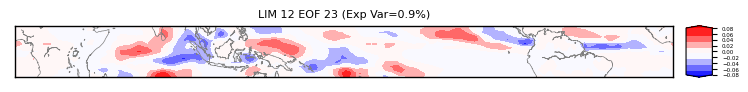

In [137]:
varname='colIrr'
for varname in ['colIrr']:
# for varname in ['H500','SLP','T2m','SOIL','SST','SF750','SF100']:
    # for mn in range(1,2):
    for mn in range(1,13):
        os.system(f'mkdir -p {varname}')
        os.system(f'mkdir -p {varname}/figs')
        num_eofs = eof_trunc[varname]
        # num_eofs = 1
        mycmap=make_colormap({0:'b',.45:'w',.55:'w',1:'r'})
        varobj = LIMdriver.use_vars[varname]['data'] 
        lat = varobj.latgrid
        lon = varobj.longrid
        eofobj = LIMdriver.eofobjs[mn][varname]
        PCs = eofobj.eof_dict['pc'][:,:num_eofs].T
        expVARs = eofobj.eof_dict['var_expl_by_eof'][:num_eofs]*100
        print(f'{varname}, LIM {mn} total variance = {np.sum(expVARs)}')

        TE = None

        if TE is None:
            gs = gridspec.GridSpec(2, 1, height_ratios=[7,3])
        else:
            gs = gridspec.GridSpec(TE+1, 1)

        if TE is None:
            TE = 1
            EOFs = np.expand_dims(eofobj.eof_dict['eof'][:num_eofs],-1)
        else:
            EOFs = eofobj.eof_dict['eof'][:num_eofs]
        figs = []
        for iEOF,(EOF,PC,VAR) in enumerate(zip(EOFs,PCs,expVARs)):
            m,addcyc = map_proj(varobj.lat,varobj.lon)
            plt.close()
            fig=plt.figure(figsize=(9,9))

            for iTE in range(TE):
                m._mapboundarydrawn=False
                ax=fig.add_subplot(gs[iTE])

                EOFmap = varobj.regrid(EOF[:,iTE])
                if addcyc:
                    pltdata,lons = addcyclic(EOFmap,lon)
                    lats = np.concatenate([lat,lat[:,0][:,None]],axis=1)
                else:
                    pltdata,lons,lats = EOFmap,lon,lat
                mx,my = m(lons,lats)
                m.drawcoastlines(linewidth=0.5,color='0.5')
                m.drawmapboundary(linewidth=1)
                if varname == 'colIrr' or varname == 'SOIL' or varname =='T2m':
                    cnLevels = np.linspace(-.08,.08,9)
                elif varname == 'SF100' or varname == 'SF750' or varname =='SST':
                    cnLevels = np.linspace(-.04,.04,9)
                else:
                    cnLevels = np.linspace(-.02,.02,9)
                cs = m.contourf(mx,my,pltdata,cnLevels,cmap=mycmap,extend='both')
                ax.set_title(f'LIM {mn} EOF {iEOF+1} (Exp Var={VAR:.1f}%)',size=8)
                cbar = m.colorbar(cs,size='4%')
                cbar.solids.set_edgecolor('face')
                # cbar.set_ticklabels(cnLevels[::2])
                for i in cbar.ax.yaxis.get_ticklabels():
                        i.set_size(4)
                fig.savefig( f'./{varname}/figs/LIM_{str(mn).zfill(2)}_EOF_{str(iEOF+1).zfill(2)}', dpi=300, bbox_inches='tight')




In [6]:
time_series_list = []

for mn in range(1,13,1):
    ds = xr.open_dataset(f'./colIrr/{mn}/EOF_colIrr.nc')
    print(ds)
    monthly_data = ds.pc.sel(time=ds['time.month'] == mn)
    time_series_list.append(monthly_data)



<xarray.Dataset>
Dimensions:     (index: 100, time: 3548, lon_colIrr: 180, lat_colIrr: 91)
Coordinates:
  * index       (index) float64 1.0 2.0 3.0 4.0 5.0 ... 97.0 98.0 99.0 100.0
  * time        (time) datetime64[ns] 1958-01-08 1958-01-09 ... 2016-03-01
  * lon_colIrr  (lon_colIrr) float64 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * lat_colIrr  (lat_colIrr) float64 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
Data variables:
    pc          (time, index) float32 ...
    varexp      (index) float32 ...
    eof_colIrr  (index, lat_colIrr, lon_colIrr) float32 ...
<xarray.Dataset>
Dimensions:     (index: 100, time: 3555, lon_colIrr: 180, lat_colIrr: 91)
Coordinates:
  * index       (index) float64 1.0 2.0 3.0 4.0 5.0 ... 97.0 98.0 99.0 100.0
  * time        (time) datetime64[ns] 1958-02-01 1958-02-02 ... 2016-04-01
  * lon_colIrr  (lon_colIrr) float64 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * lat_colIrr  (lat_colIrr) float64 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
Data variables

In [4]:
mn=1
ds = xr.open_dataset(f'./colIrr/{mn}/EOF_colIrr.nc')
ts = xr.open_dataset(f'./colIrr/pc.all.nc')
print(ds)
print(ts)
# monthly_data = ds.pc.sel(time=ds['time.month'] == mn)
# time_series_list.append(monthly_data)
# monthly_data.time
ds.varexp

<xarray.Dataset>
Dimensions:     (index: 100, time: 3548, lon_colIrr: 180, lat_colIrr: 91)
Coordinates:
  * index       (index) float64 1.0 2.0 3.0 4.0 5.0 ... 97.0 98.0 99.0 100.0
  * time        (time) datetime64[ns] 1958-01-08 1958-01-09 ... 2016-03-01
  * lon_colIrr  (lon_colIrr) float64 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * lat_colIrr  (lat_colIrr) float64 90.0 88.0 86.0 84.0 ... -86.0 -88.0 -90.0
Data variables:
    pc          (time, index) float32 ...
    varexp      (index) float32 ...
    eof_colIrr  (index, lat_colIrr, lon_colIrr) float32 ...
<xarray.Dataset>
Dimensions:  (index: 100, time: 21543)
Coordinates:
  * index    (index) float64 1.0 2.0 3.0 4.0 5.0 ... 96.0 97.0 98.0 99.0 100.0
  * time     (time) datetime64[ns] 1958-01-08 1958-01-09 ... 2016-12-31
Data variables:
    pc       (index, time) float32 ...


<xarray.DataArray 'varexp' (index: 100)>
[100 values with dtype=float32]
Coordinates:
  * index    (index) float64 1.0 2.0 3.0 4.0 5.0 ... 96.0 97.0 98.0 99.0 100.0
Attributes:
    long_name:  variance explained by EOF
    units:      fraction of 1

In [8]:
monthly_data.time[0:62]

<xarray.DataArray 'time' (time: 62)>
array(['1958-01-08T00:00:00.000000000', '1958-01-09T00:00:00.000000000',
       '1958-01-10T00:00:00.000000000', '1958-01-11T00:00:00.000000000',
       '1958-01-12T00:00:00.000000000', '1958-01-13T00:00:00.000000000',
       '1958-01-14T00:00:00.000000000', '1958-01-15T00:00:00.000000000',
       '1958-01-16T00:00:00.000000000', '1958-01-17T00:00:00.000000000',
       '1958-01-18T00:00:00.000000000', '1958-01-19T00:00:00.000000000',
       '1958-01-20T00:00:00.000000000', '1958-01-21T00:00:00.000000000',
       '1958-01-22T00:00:00.000000000', '1958-01-23T00:00:00.000000000',
       '1958-01-24T00:00:00.000000000', '1958-01-25T00:00:00.000000000',
       '1958-01-26T00:00:00.000000000', '1958-01-27T00:00:00.000000000',
       '1958-01-28T00:00:00.000000000', '1958-01-29T00:00:00.000000000',
       '1958-01-30T00:00:00.000000000', '1958-01-31T00:00:00.000000000',
       '1959-01-01T00:00:00.000000000', '1959-01-02T00:00:00.000000000',
       '1959-01-03T00:00:00.000000000', '1959-01-04T00:00:00.000000000',
       '1959-01-05T00:00:00.000000000', '1959-01-06T00:00:00.000000000',
       '1959-01-07T00:00:00.000000000', '1959-01-08T00:00:00.000000000',
       '1959-01-09T00:00:00.000000000', '1959-01-10T00:00:00.000000000',
       '1959-01-11T00:00:00.000000000', '1959-01-12T00:00:00.000000000',
       '1959-01-13T00:00:00.000000000', '1959-01-14T00:00:00.000000000',
       '1959-01-15T00:00:00.000000000', '1959-01-16T00:00:00.000000000',
       '1959-01-17T00:00:00.000000000', '1959-01-18T00:00:00.000000000',
       '1959-01-19T00:00:00.000000000', '1959-01-20T00:00:00.000000000',
       '1959-01-21T00:00:00.000000000', '1959-01-22T00:00:00.000000000',
       '1959-01-23T00:00:00.000000000', '1959-01-24T00:00:00.000000000',
       '1959-01-25T00:00:00.000000000', '1959-01-26T00:00:00.000000000',
       '1959-01-27T00:00:00.000000000', '1959-01-28T00:00:00.000000000',
       '1959-01-29T00:00:00.000000000', '1959-01-30T00:00:00.000000000',
       '1959-01-31T00:00:00.000000000', '1960-01-01T00:00:00.000000000',
       '1960-01-02T00:00:00.000000000', '1960-01-03T00:00:00.000000000',
       '1960-01-04T00:00:00.000000000', '1960-01-05T00:00:00.000000000',
       '1960-01-06T00:00:00.000000000', '1960-01-07T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1958-01-08 1958-01-09 ... 1960-01-07
Attributes:
    long_name:      Time
    delta_t:        0000-00-01 00:00:00
    standard_name:  time
    axis:           T

In [9]:
concatenated_data = xr.concat(time_series_list, dim='time')


In [10]:
concatenated_data.time[0:35]

<xarray.DataArray 'time' (time: 35)>
array(['1958-01-08T00:00:00.000000000', '1958-01-09T00:00:00.000000000',
       '1958-01-10T00:00:00.000000000', '1958-01-11T00:00:00.000000000',
       '1958-01-12T00:00:00.000000000', '1958-01-13T00:00:00.000000000',
       '1958-01-14T00:00:00.000000000', '1958-01-15T00:00:00.000000000',
       '1958-01-16T00:00:00.000000000', '1958-01-17T00:00:00.000000000',
       '1958-01-18T00:00:00.000000000', '1958-01-19T00:00:00.000000000',
       '1958-01-20T00:00:00.000000000', '1958-01-21T00:00:00.000000000',
       '1958-01-22T00:00:00.000000000', '1958-01-23T00:00:00.000000000',
       '1958-01-24T00:00:00.000000000', '1958-01-25T00:00:00.000000000',
       '1958-01-26T00:00:00.000000000', '1958-01-27T00:00:00.000000000',
       '1958-01-28T00:00:00.000000000', '1958-01-29T00:00:00.000000000',
       '1958-01-30T00:00:00.000000000', '1958-01-31T00:00:00.000000000',
       '1959-01-01T00:00:00.000000000', '1959-01-02T00:00:00.000000000',
       '1959-01-03T00:00:00.000000000', '1959-01-04T00:00:00.000000000',
       '1959-01-05T00:00:00.000000000', '1959-01-06T00:00:00.000000000',
       '1959-01-07T00:00:00.000000000', '1959-01-08T00:00:00.000000000',
       '1959-01-09T00:00:00.000000000', '1959-01-10T00:00:00.000000000',
       '1959-01-11T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1958-01-08 1958-01-09 ... 1959-01-11
Attributes:
    long_name:      Time
    delta_t:        0000-00-01 00:00:00
    standard_name:  time
    axis:           T

In [11]:
sorted_concatenated_data = concatenated_data.sortby('time')
sorted_concatenated_data.time[0:62]

<xarray.DataArray 'time' (time: 62)>
array(['1958-01-08T00:00:00.000000000', '1958-01-09T00:00:00.000000000',
       '1958-01-10T00:00:00.000000000', '1958-01-11T00:00:00.000000000',
       '1958-01-12T00:00:00.000000000', '1958-01-13T00:00:00.000000000',
       '1958-01-14T00:00:00.000000000', '1958-01-15T00:00:00.000000000',
       '1958-01-16T00:00:00.000000000', '1958-01-17T00:00:00.000000000',
       '1958-01-18T00:00:00.000000000', '1958-01-19T00:00:00.000000000',
       '1958-01-20T00:00:00.000000000', '1958-01-21T00:00:00.000000000',
       '1958-01-22T00:00:00.000000000', '1958-01-23T00:00:00.000000000',
       '1958-01-24T00:00:00.000000000', '1958-01-25T00:00:00.000000000',
       '1958-01-26T00:00:00.000000000', '1958-01-27T00:00:00.000000000',
       '1958-01-28T00:00:00.000000000', '1958-01-29T00:00:00.000000000',
       '1958-01-30T00:00:00.000000000', '1958-01-31T00:00:00.000000000',
       '1958-02-01T00:00:00.000000000', '1958-02-02T00:00:00.000000000',
       '1958-02-03T00:00:00.000000000', '1958-02-04T00:00:00.000000000',
       '1958-02-05T00:00:00.000000000', '1958-02-06T00:00:00.000000000',
       '1958-02-07T00:00:00.000000000', '1958-02-08T00:00:00.000000000',
       '1958-02-09T00:00:00.000000000', '1958-02-10T00:00:00.000000000',
       '1958-02-11T00:00:00.000000000', '1958-02-12T00:00:00.000000000',
       '1958-02-13T00:00:00.000000000', '1958-02-14T00:00:00.000000000',
       '1958-02-15T00:00:00.000000000', '1958-02-16T00:00:00.000000000',
       '1958-02-17T00:00:00.000000000', '1958-02-18T00:00:00.000000000',
       '1958-02-19T00:00:00.000000000', '1958-02-20T00:00:00.000000000',
       '1958-02-21T00:00:00.000000000', '1958-02-22T00:00:00.000000000',
       '1958-02-23T00:00:00.000000000', '1958-02-24T00:00:00.000000000',
       '1958-02-25T00:00:00.000000000', '1958-02-26T00:00:00.000000000',
       '1958-02-27T00:00:00.000000000', '1958-02-28T00:00:00.000000000',
       '1958-03-01T00:00:00.000000000', '1958-03-02T00:00:00.000000000',
       '1958-03-03T00:00:00.000000000', '1958-03-04T00:00:00.000000000',
       '1958-03-05T00:00:00.000000000', '1958-03-06T00:00:00.000000000',
       '1958-03-07T00:00:00.000000000', '1958-03-08T00:00:00.000000000',
       '1958-03-09T00:00:00.000000000', '1958-03-10T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1958-01-08 1958-01-09 ... 1958-03-10
Attributes:
    long_name:      Time
    delta_t:        0000-00-01 00:00:00
    standard_name:  time
    axis:           T

In [12]:

# sorted_concatenated_data.isel(index=0).isel(time=slice(0,800)).plot()
# sorted_concatenated_data.isel(index=0).plot()
# sorted_concatenated_data.time[0:100]
sorted_concatenated_data = sorted_concatenated_data.transpose('index','time')

In [13]:
sorted_concatenated_data

<xarray.DataArray 'pc' (index: 100, time: 21543)>
array([[  9.757557  ,  10.339179  ,  11.287703  , ..., -15.960396  ,
        -15.292463  , -14.11585   ],
       [  0.33283034,   0.87461656,   2.6148977 , ...,  -4.4605403 ,
         -3.7928522 ,  -2.5207098 ],
       [ -0.15854532,  -3.1486392 ,  -4.9808865 , ...,  -6.118103  ,
         -4.7604437 ,  -3.2261667 ],
       ...,
       [  0.511308  ,   0.8081944 ,   0.50935745, ...,  -4.31546   ,
         -4.9476037 ,  -4.9752674 ],
       [  2.2068875 ,   3.2426145 ,   3.134871  , ...,   0.7031523 ,
         -0.332833  ,  -0.6862633 ],
       [ -0.9984599 ,  -2.0932584 ,  -2.8100424 , ...,  -1.0881116 ,
          0.49208006,   1.1299618 ]], dtype=float32)
Coordinates:
  * index    (index) float64 1.0 2.0 3.0 4.0 5.0 ... 96.0 97.0 98.0 99.0 100.0
  * time     (time) datetime64[ns] 1958-01-08 1958-01-09 ... 2016-12-31
Attributes:
    long_name:  principal components

In [14]:
da = xr.DataArray(sorted_concatenated_data,coords={'index': sorted_concatenated_data.index,'time': sorted_concatenated_data.time},dims=['index','time'])

In [15]:
os.system('rm -f ./colIrr/pc.all.nc')
da.to_netcdf('./colIrr/pc.all.nc')

In [16]:
ds = xr.open_dataset('./colIrr/pc.all.nc')
# print(ds['pc'][0].sel(time=slice('2016-2-1','2016-2-28')).values)
# ds['pc'][0].isel(time=-1)
ds

<xarray.Dataset>
Dimensions:  (index: 100, time: 21543)
Coordinates:
  * index    (index) float64 1.0 2.0 3.0 4.0 5.0 ... 96.0 97.0 98.0 99.0 100.0
  * time     (time) datetime64[ns] 1958-01-08 1958-01-09 ... 2016-12-31
Data variables:
    pc       (index, time) float32 ...

Testing if the pc time series is concat properly by reading in pickle files

In [17]:

# m=2
# limkey = m
# varname='colIrr'
# varobj = LIMdriver.use_vars[varname]['data'] 
# eofobj = LIMdriver.eofobjs[m][varname]
# eofobj.pc[-61:-30][0]
# eofobj.pc[:][0].shape
# eofobj.pc.shape
# pc_np = np.array(eofobj.pc)
# pc_np[-61:-30,0]

In [7]:
omiURL = 'https://www.psl.noaa.gov/mjo/mjoindex/omi.1x.txt'
df = pd.read_csv(omiURL,delim_whitespace=True, skiprows=0, names=["Year", "Month", "Day","Hour", "OMI1", "OMI2","OMI_amp"])
df
# omi_amp = df[4]^

,Year,Month,Day,Hour,OMI1,OMI2,OMI_amp
0,1979,1,1,0,0.16041,0.77522,0.79164
1,1979,1,2,0,0.01581,0.85422,0.85436
2,1979,1,3,0,-0.16171,0.92164,0.93572
3,1979,1,4,0,-0.36540,0.96801,1.03468
4,1979,1,5,0,-0.58519,0.98446,1.14525
...,...,...,...,...,...,...,...
16066,2022,12,27,0,-1.34836,1.40030,1.94394
16067,2022,12,28,0,-1.31300,1.34591,1.88028
16068,2022,12,29,0,-1.23830,1.23585,1.74948
16069,2022,12,30,0,-1.13109,1.07224,1.55854


In [8]:
df['OMI_amp'][:]
df['OMI_amp_my'] = np.sqrt(df['OMI1']**2 + df['OMI2']**2)
# df.loc[0]


In [9]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
# df['Year'][:]
# df['Month'][:]
# Create an xarray DataArray from 'OMI' data and the new 'Date' column
# omi_data = xr.DataArray(df['OMI_amp'], coords=[('time', df['Date'])], dims=['time'])

# Create an xarray dataset with the OMI data
# ds_omi = omi_data.to_dataset(name='OMI')
df


,Year,Month,Day,Hour,OMI1,OMI2,OMI_amp,OMI_amp_my,Date
0,1979,1,1,0,0.16041,0.77522,0.79164,0.791642,1979-01-01
1,1979,1,2,0,0.01581,0.85422,0.85436,0.854366,1979-01-02
2,1979,1,3,0,-0.16171,0.92164,0.93572,0.935719,1979-01-03
3,1979,1,4,0,-0.36540,0.96801,1.03468,1.034679,1979-01-04
4,1979,1,5,0,-0.58519,0.98446,1.14525,1.145255,1979-01-05
...,...,...,...,...,...,...,...,...,...
16066,2022,12,27,0,-1.34836,1.40030,1.94394,1.943943,2022-12-27
16067,2022,12,28,0,-1.31300,1.34591,1.88028,1.880277,2022-12-28
16068,2022,12,29,0,-1.23830,1.23585,1.74948,1.749489,2022-12-29
16069,2022,12,30,0,-1.13109,1.07224,1.55854,1.558545,2022-12-30


In [10]:
omi_amp_xarray = xr.DataArray(df['OMI_amp'].values, coords=[df['Date']], dims=['time'])
omi_1_xarray   = xr.DataArray(df['OMI1'].values, coords=[df['Date']], dims=['time'])
omi_2_xarray   = xr.DataArray(df['OMI2'].values, coords=[df['Date']], dims=['time'])



In [11]:
omi = xr.Dataset(data_vars={'omi1':omi_1_xarray,'omi2':omi_2_xarray,'omiamp':omi_amp_xarray,})

In [12]:
omi

<xarray.Dataset>
Dimensions:  (time: 16071)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
Data variables:
    omi1     (time) float64 0.1604 0.01581 -0.1617 ... -1.238 -1.131 -0.9773
    omi2     (time) float64 0.7752 0.8542 0.9216 0.968 ... 1.236 1.072 0.8872
    omiamp   (time) float64 0.7916 0.8544 0.9357 1.035 ... 1.88 1.749 1.559 1.32

In [13]:
omi_amp_xarray.sel(time = slice('1979-01-01','2016-12-31'))

<xarray.DataArray (time: 13880)>
array([0.79164, 0.85436, 0.93572, ..., 0.64589, 0.68554, 0.69707])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2016-12-31

In [25]:
ds = xr.open_dataset('./colIrr/pc.all.nc')
ds = ds['pc'][0:23].sel(time=slice('1979-01-01','2016-12-31'))


In [26]:

corr_matrix = []
for m in range(0,10):
    for n in range(0,10):
        for lag in range(0,20):
                lagged_ds = ds[m].shift(time=lag)
                # print(lag,lagged_ds)
                # print(ds[m].values)
                corr = xr.corr(lagged_ds,ds[n],dim='time')
                # print('corr = ',corr)
                corr_matrix.append(corr)


In [27]:
corr_matrix = xr.DataArray(np.array(corr_matrix).reshape(10,10,20), dims=['m', 'n', 'lag'], coords={'m': range(0,10), 'n': range(0,10), 'lag': range(0,20)})


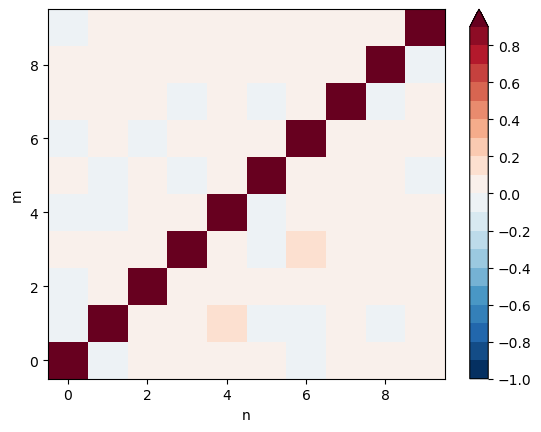

In [28]:
cnLevels = np.arange(-1,1.,0.1)

# stacked_corr_matrices[:][0].plot(levels=cnLevels)
# stacked_corr_matrices.isel(index=0).plot()
# corr_matrix.sel(lag=0).plot(levels=cnLevels)
corr_max = corr_matrix.max(dim='lag')
corr_max.plot(levels= cnLevels)

In [86]:
ds

<xarray.DataArray 'pc' (index: 23, time: 13880)>
array([[  2.345821,   2.780901,   3.568628, ..., -15.960396, -15.292463,
        -14.11585 ],
       [ -3.592   ,  -2.344133,  -1.228852, ...,  -4.46054 ,  -3.792852,
         -2.52071 ],
       [ 16.195244,  15.853936,  16.917494, ...,  -6.118103,  -4.760444,
         -3.226167],
       ...,
       [ -3.006343,  -3.981573,  -3.114427, ...,  -0.417396,   1.382818,
          1.579106],
       [ -6.828965,  -5.014774,  -3.486656, ...,   4.904186,   5.712827,
          5.417611],
       [ -6.614321,  -7.55065 ,  -9.846361, ...,   1.368379,   3.740042,
          5.672114]], dtype=float32)
Coordinates:
  * index    (index) float64 1.0 2.0 3.0 4.0 5.0 ... 19.0 20.0 21.0 22.0 23.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2016-12-31
Attributes:
    long_name:  principal components

In [115]:
squared_data = ds ** 2
for nind in range(1,24):
    sum_over_index = squared_data.sel(index=slice(0,nind)).sum(dim='index')

    sqrt_of_sum_over_index =  xr.DataArray(np.sqrt(sum_over_index))
    corr = xr.corr(omi.omiamp,sqrt_of_sum_over_index,dim='time')
    print(nind,':',corr.values)
# squared_data.sum(dim=index)
# Calculate the sum of squared values at index 23
# total_at_index_23 = squared_data.isel(time=23).sum().values

1 : 0.016590867468757146
2 : 0.09440387706315757
3 : 0.15985587986661495
4 : 0.18527216748551828
5 : 0.19832226958711757
6 : 0.19443893309655635
7 : 0.19703818504494844
8 : 0.20257759315075238
9 : 0.19476811397339275
10 : 0.19604488384370627
11 : 0.1993126431933836
12 : 0.19889355016849153
13 : 0.20206152461753685
14 : 0.2016962189172084
15 : 0.20082990954019844
16 : 0.19648924023874884
17 : 0.19537774464575455
18 : 0.19472490771366202
19 : 0.19631712345406577
20 : 0.19737325307843775
21 : 0.19680792994710766
22 : 0.1979972863835768
23 : 0.19556387926623828


In [106]:
mean_val, std_dev = sqrt_of_sum_over_index.mean(), sqrt_of_sum_over_index.std()
normalized_data = (sqrt_of_sum_over_index - mean_val) / std_dev

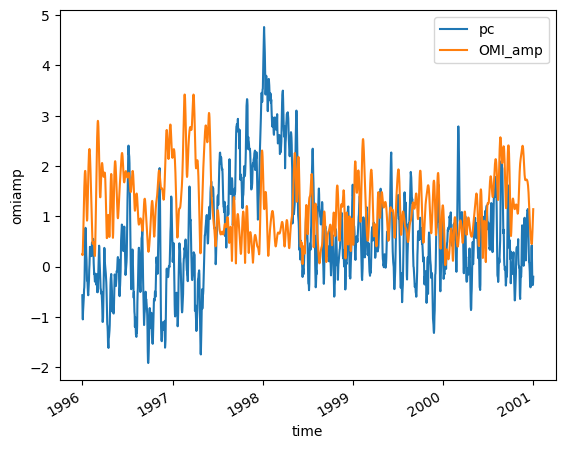

In [132]:
fig, ax = plt.subplots()
t0, t1 = "1980-1-1","1985-12-31"
t0, t1 = "1996-1-1","2000-12-31"
# Plot the first DataArray
normalized_data.sel(time = slice(t0,t1)).plot.line(ax=ax, label="pc")

# Plot the second DataArray on the same axis
# omi.omi1.plot.line(ax=ax, label="OMI1")
# omi.omi2.plot.line(ax=ax, label="OMI2")
omi.omiamp.sel(time = slice(t0,t1)).plot.line(ax=ax, label="OMI_amp")

# Add a legend to distinguish between the two lines
plt.legend()

# Show the plot
plt.show()

In [30]:
corr_matrix_omi = []
for m in range(0,2):
    for n in range(0,2):
        for lag in range(0,20):
                lagged_omi1 = omi.omi1.shift(time=lag)
                # print(lag,lagged_ds)
                # print(ds[m].values)
                corr = xr.corr(lagged_omi1,omi.omi2,dim='time')
                # print('corr = ',corr)
                corr_matrix_omi.append(corr)

In [31]:
corr_matrix_omi = xr.DataArray(np.array(corr_matrix_omi).reshape(2,2,20), dims=['m', 'n', 'lag'], coords={'m': range(0,10), 'n': range(0,10), 'lag': range(0,20)})


ValueError: conflicting sizes for dimension 'm': length 2 on the data but length 10 on coordinate 'm'

In [ ]:
# lagged_correlations = {}

# # Specify the range of lags (1 to 30)
# # lags = range(0, 31)
# lags = range(0, 2)
# for m in range(0,10):
#     for n in range(0,10):
#         for lag in lags:
#                 lagged_da1 = ds['pc'][m].sel(time=slice('1979-01-01','2016-12-31')).shift(time=lag)
#                 print(lagged_da1.time)
    # Calculate the correlation between lagged_da1 and da2
        #     lagged_da2 = ds['pc'][n].sel(time=slice('1979-01-01','2016-12-31')).shift(time=lag)
    # Store the correlation coefficient in the dictionary
        #     lagged_correlations[lag] = xr.corr(lagged_da1,lagged_da2,dim='time')

# Print the lagged correlations


In [ ]:
print(np.amax(lagged_correlations))
print(np.amin(lagged_correlations))
print(lagged_correlations[10])

{0: <xarray.DataArray 'pc' ()>
array(0.99999996)
Coordinates:
    index    float64 10.0, 1: <xarray.DataArray 'pc' ()>
array(0.99999997)
Coordinates:
    index    float64 10.0}
{0: <xarray.DataArray 'pc' ()>
array(0.99999996)
Coordinates:
    index    float64 10.0, 1: <xarray.DataArray 'pc' ()>
array(0.99999997)
Coordinates:
    index    float64 10.0}


KeyError: 10

In [ ]:
# for lag, correlation in lagged_correlations.items():
#     print(max(correlation).values)

TypeError: iteration over a 0-d array

In [ ]:
# DataSam = pickle.load(open('/Projects/LIM/Realtime/Realtime/webData/data_clim/tmp/fullyr_JRA_79-17_T2m.p',"rb"))

# for i in DataSam.items():
#     print(i)
# print((DataSam['data'].time))


In [ ]:
# eof1 = pickle.load(open(f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10b2_using_my_rawdata/data_clim/tmp/EOF_JRA_79-17_{varname}_{m}.p', "rb" ) )
# eof1.plot()
# eofobjs = eof1
# eofobjs.varobjs[0].time
# eofobjs.eof_dict['pc']

In [ ]:
# varname = 'colIrr'# 2 degree
# varname = 'SLP'# 4 degree
# varname = 'H500'# 4 degree
# varname = 'H100'# 4 degree
# varname = 'T2m'# 2.5 degree
# data = pickle.load( open(f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/data_climo_Sam/fullyr_JRA_79-17_{varname}.p', "rb"))
# # print(data['data'].lon)
# data['data'].plot_map()

In [ ]:
# date = dt(1989,7,31)
# data['data'].plot_map(time=date)

In [ ]:
# data2 = pickle.load( open(f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10b2_using_my_rawdata/data_clim/tmp/fullyr_JRA_79-17_T2m.p', "rb"))
# data2['data'].plot_map(time=date)

In [5]:
pop1 = xr.open_dataset('/home/ycheng/LIM/CPC/run_code/ENM/colIrr.nc')

In [14]:
pop1 = pop1.sel(time = slice('1979-01-01','2016-12-31'))

In [17]:
pop1['POP_TS']

<xarray.DataArray 'POP_TS' (nPOP: 2, time: 13880)>
[27760 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2016-12-31
  * nPOP     (nPOP) int32 0 1
Attributes:
    stdev:      [ 9.503242 11.074296]
    mean:       [-1.8988542e-08 -1.4678167e-07]
    long_name:  POP timeseries

In [16]:
omi_amp_xarray.sel(time = slice('1979-01-01','2016-12-31'))

<xarray.DataArray (time: 13880)>
array([0.79164, 0.85436, 0.93572, ..., 0.64589, 0.68554, 0.69707])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2016-12-31

In [23]:
corr = xr.corr(omi_amp_xarray.sel(time = slice('1979-01-01','2016-12-31')),pop1['POP_TS'],dim='time')
print(corr)


<xarray.DataArray (nPOP: 2)>
array([-0.01642939, -0.04560825])
Coordinates:
  * nPOP     (nPOP) int32 0 1


In [ ]:
corr_matrix_omi = []
for m in range(0,2):
    for n in range(0,2):
        for lag in range(0,20):
                lagged_omi1 = omi.omi1.shift(time=lag)
                # print(lag,lagged_ds)
                # print(ds[m].values)
                corr = xr.corr(lagged_omi1,omi.omi2,dim='time')
                # print('corr = ',corr)
                corr_matrix_omi.append(corr)